In [1]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(readr)
library(gridExtra)
library(Cairo)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyr' was built under R version 3.3.3"Warning message:
"package 'ggplot2' was built under R version 3.3.3"Warning message:
"package 'readr' was built under R version 3.3.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



## 5.1 2標本の平均値間の“有意な差”とは？

In [2]:
data1 <- data_frame(
    m = c(143.1, 140.9, 147.2, 139.8, 141.3, 150.7, 149.4, 145.6, 146.5, 148.5, 141.2, 136.5, 145.8, 148.1, 144.3), 
    f = c(138.7, 142.8, 150.3, 148.4, 141.7, 149.5, 156.5, 144.6, 144.4, 145.7, 148.3, 140.8, 146.2, 149.9, 144.1)
)
head(data1)

m,f
143.1,138.7
140.9,142.8
147.2,150.3
139.8,148.4
141.3,141.7
150.7,149.5


In [3]:
data2 <- data_frame(
    m = c(142.3, 142.5, 145.7, 143.5, 144.2, 145.1, 145.9, 145.2, 146.8, 145.7, 145.4, 144.6, 144.2, 145.9, 142.1),
    f = c(143.5, 144.6, 143.4, 146.6, 145.3, 147.7, 147.2, 147.8, 145.3, 145.7, 147.5, 147.2, 148.8, 147.9, 143.3)
)
head(data2)

m,f
142.3,143.5
142.5,144.6
145.7,143.4
143.5,146.6
144.2,145.3
145.1,147.7


In [4]:
data1 %>% summarise_all(.funs = mean)

m,f
144.5933,146.1267


In [6]:
data2 %>% summarise_all(.funs = mean)

m,f
144.6067,146.12


* 「小学6年生だと女子の方が男子よりも身長が高い」のか？

In [19]:
options(repr.plot.height = 4, repr.plot.width = 6)

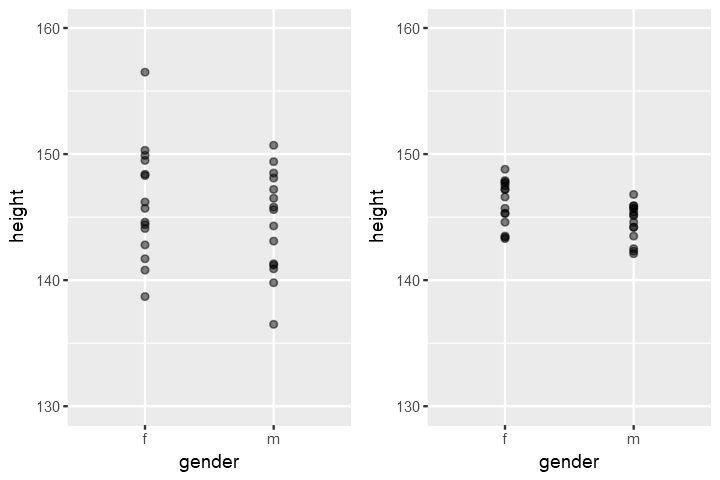

In [24]:
gp1 <- data1 %>% gather(gender, height) %>% 
    ggplot(aes(x = gender, y = height)) +
        geom_point(alpha = 0.5) + ylim(c(130, 160))
gp2 <- data2 %>% gather(gender, height) %>% 
    ggplot(aes(x = gender, y = height)) + 
        geom_point(alpha = 0.5) + ylim(c(130, 160))
grid.arrange(gp1, gp2, ncol=2)

## 5.2 帰無仮説と対立仮説: “第1種の過誤”と“第2種の過誤”

## 5.3 帰無仮説検定: $t$検定の概念と計算法

## 5.4 $t$ 検定の考え方とRを使った計算

In [25]:
surgery <- data_frame(new = c(2, 3, 6, 7, 4, 5, 6, 3), 
                     old = c(5, 7, 5, 8, 9, 7, 7, 6))
surgery

new,old
2,5
3,7
6,5
7,8
4,9
5,7
6,7
3,6


In [28]:
surgery %>% {
    t.test(.$new, .$old, var=TRUE)
    }


	Two Sample t-test

data:  .$new and .$old
t = -2.8259, df = 14, p-value = 0.01347
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.9576713 -0.5423287
sample estimates:
mean of x mean of y 
     4.50      6.75 


In [32]:
my.t.test <- function(x, y){
    n.x <- length(x)
    n.y <- length(x)
    
    mean.x <- mean(x)
    mean.y <- mean(y)
    ss.x <- sum((x - mean.x)^2)
    ss.y <- sum((y - mean.y)^2)
    sp2 <- (ss.x + ss.y) / (n.x + n.y - 2)
    se_mean <- sqrt(sp2 * (n.x + n.y) / (n.x * n.y))
    t_val <- (mean.x - mean.y) / se_mean
    return(t_val)
}
surgery %>% {
    my.t.test(.$new, .$old)
    }

[1] -2.825936

In [33]:
qt(0.025, df = 14)

[1] -2.144787

In [34]:
qt(0.975, df = 14)

[1] 2.144787

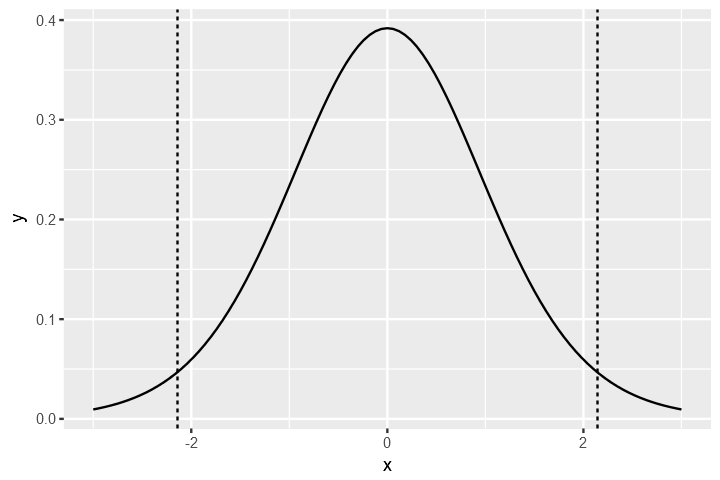

In [40]:
ggplot(data_frame(x = c(-3, 3)), aes(x)) + stat_function(geom="line", fun = dt, args = list(df = 14)) + 
    geom_vline(xintercept = -2.144, linetype = 2) + 
    geom_vline(xintercept = 2.144, linetype = 2) 

## $t$ 検定のいくつかの事例

In [42]:
data1 %>% {
    t.test(.$m, .$f, var = TRUE)
}


	Two Sample t-test

data:  .$m and .$f
t = -0.98202, df = 28, p-value = 0.3345
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.731732  1.665065
sample estimates:
mean of x mean of y 
 144.5933  146.1267 


In [43]:
data2 %>% {
    t.test(.$m, .$f, var=TRUE)
}


	Two Sample t-test

data:  .$m and .$f
t = -2.523, df = 28, p-value = 0.01759
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.7419982 -0.2846684
sample estimates:
mean of x mean of y 
 144.6067  146.1200 


In [44]:
growth1 <- data_frame(
    t = c(5.5, 4.2, 3.7, 5.1, 4.4, 4.3), 
    c = c(3.9, 4.1, 3.8, 3.2, 4.5, 3.8)
)
growth1 %>% {
    t.test(.$t, .$c, var=TRUE)
}


	Two Sample t-test

data:  .$t and .$c
t = 2.0414, df = 10, p-value = 0.06849
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.05947555  1.35947555
sample estimates:
mean of x mean of y 
 4.533333  3.883333 


In [45]:
growth1 %>% {
    t.test(c(.$t, .$t), c(.$c,.$c),  var=TRUE)
}


	Two Sample t-test

data:  c(.$t, .$t) and c(.$c, .$c)
t = 3.0278, df = 22, p-value = 0.006182
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2047889 1.0952111
sample estimates:
mean of x mean of y 
 4.533333  3.883333 


## 5.6 検出力を高めるもう一つの方法: 対応のある$t$ 検定

In [46]:
foods <- data_frame(
    tomato = c(6, 16, 10, 14, 24, 8), 
    banana = c(1, 10, 5, 15, 20, 3)
)
foods %>% {
    t.test(.$tomato, .$banana, var=TRUE)
}


	Two Sample t-test

data:  .$tomato and .$banana
t = 0.99177, df = 10, p-value = 0.3447
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.98652 12.98652
sample estimates:
mean of x mean of y 
       13         9 


In [49]:
foods %>% mutate(id = c(1:6), d = tomato - banana) %>% select(id, tomato, banana, d)

id,tomato,banana,d
1,6,1,5
2,16,10,6
3,10,5,5
4,14,15,-1
5,24,20,4
6,8,3,5


In [55]:
?summarise_at

In [57]:
foods %>% mutate(id = c(1:6), d = tomato - banana) %>% select(id, tomato, banana, d) %>% 
    summarise_at(vars(-id), mean)

tomato,banana,d
13,9,4


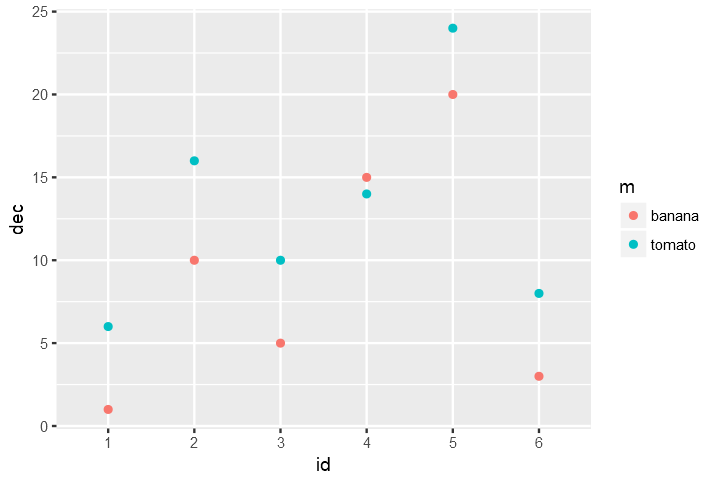

In [61]:
foods %>% mutate(id = as.character(c(1L:6L))) %>% gather(m, dec, -id) %>% 
    ggplot(aes(x = id, y = dec, group = m, colour = m)) + geom_point() 

In [64]:
?t.test

In [62]:
foods %>% mutate(d = tomato - banana) %>% {
    t.test(.$d, mu = 0)
}


	One Sample t-test

data:  .$d
t = 3.873, df = 5, p-value = 0.01172
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 1.345114 6.654886
sample estimates:
mean of x 
        4 


* 対応のある$t$検定をするには，`paired = TRUE` とすればよい

In [65]:
foods %>% {
    t.test(.$tomato, .$banana, paired = TRUE)
}


	Paired t-test

data:  .$tomato and .$banana
t = 3.873, df = 5, p-value = 0.01172
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.345114 6.654886
sample estimates:
mean of the differences 
                      4 


---
* 正規性の検定（シャピーロ・ウィルク検定）
    * 帰無仮説: 正規分布に従う母集団から標本が抽出された

In [66]:
?shapiro.test

In [69]:
data1$m %>% shapiro.test()


	Shapiro-Wilk normality test

data:  .
W = 0.96769, p-value = 0.8224


In [70]:
data1$f %>% shapiro.test()


	Shapiro-Wilk normality test

data:  .
W = 0.9699, p-value = 0.8566


---
* 等分散性の検定（バートレット検定）
    * 帰無仮説: 分散は等しい

In [71]:
?bartlett.test

In [77]:
?as.factor

In [78]:
data1 %>% gather(sex, score) %>% mutate(sex = factor(sex, levels = c("m", "f"))) %>% str()

Classes 'tbl_df', 'tbl' and 'data.frame':	30 obs. of  2 variables:
 $ sex  : Factor w/ 2 levels "m","f": 1 1 1 1 1 1 1 1 1 1 ...
 $ score: num  143 141 147 140 141 ...


In [79]:
data1 %>% gather(sex, score) %>% mutate(sex = factor(sex, levels = c("m", "f"))) %>% {
    bartlett.test(score ~ sex, data = .)
}


	Bartlett test of homogeneity of variances

data:  score by sex
Bartlett's K-squared = 0.16669, df = 1, p-value = 0.6831


## 二つの標本が等分散でないときの有意差検定: ウェルチの検定

In [82]:
ls()

[1] "data1"     "data2"     "foods"     "gp1"       "gp2"       "growth1"  
[7] "my.t.test" "surgery"

In [83]:
data3 <- data_frame(
    x1 = c(23, 20, 20, 24, 17, 19, 26, 22, 19, 21), 
    x2 = c(17, 23, 25, 34, 25, 28, 20, 31, 26, 36)
)

In [84]:
options(repr.plot.width = 3, repr.plot.height = 3)

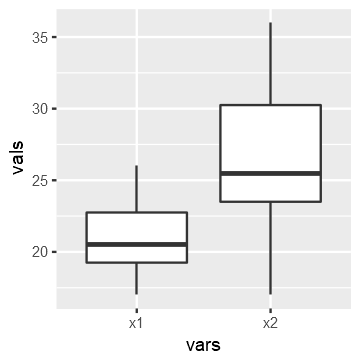

In [86]:
data3 %>% gather(vars, vals) %>% ggplot(aes(x = vars, y = vals)) + geom_boxplot()

In [87]:
data3 %>% summarise_all(.funs = funs(var))

x1,x2
7.211111,35.38889


In [89]:
data3 %>% gather(group, score) %>% mutate(group = factor(group, levels = c("x1", "x2"))) %>% {
    bartlett.test(score ~ group, data = .)
}


	Bartlett test of homogeneity of variances

data:  score by group
Bartlett's K-squared = 4.906, df = 1, p-value = 0.02676


In [90]:
data3 %>% {
    t.test(.$x1, .$x2, var = FALSE)
}


	Welch Two Sample t-test

data:  .$x1 and .$x2
t = -2.6163, df = 12.522, p-value = 0.02188
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -9.8763303 -0.9236697
sample estimates:
mean of x mean of y 
     21.1      26.5 


## 演習問題
### ex.1-1

In [91]:
growth2 <- data_frame(
    t = c(25, 15, 19, 17, 22, 20), 
    c = c(16, 18, 17, 11, 19, 14)
)
growth2

t,c
25,16
15,18
19,17
17,11
22,19
20,14


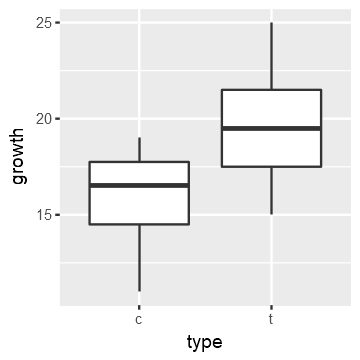

In [124]:
growth2 %>% gather(type, growth) %>% ggplot(aes(x = type, y = growth)) + geom_boxplot()

In [92]:
growth2$t %>% shapiro.test()


	Shapiro-Wilk normality test

data:  .
W = 0.9908, p-value = 0.991


In [93]:
growth2$c %>% shapiro.test()


	Shapiro-Wilk normality test

data:  .
W = 0.94283, p-value = 0.682


In [97]:
growth2 %>% gather(type, growth) %>% mutate(type = factor(type)) %>% {
    bartlett.test(growth ~ type, data = .)
}


	Bartlett test of homogeneity of variances

data:  growth by type
Bartlett's K-squared = 0.17272, df = 1, p-value = 0.6777


In [98]:
growth2 %>% {
    t.test(.$t, .$c, var=TRUE)
}


	Two Sample t-test

data:  .$t and .$c
t = 2.0377, df = 10, p-value = 0.06891
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3582269  8.0248936
sample estimates:
mean of x mean of y 
 19.66667  15.83333 


### ex1-2

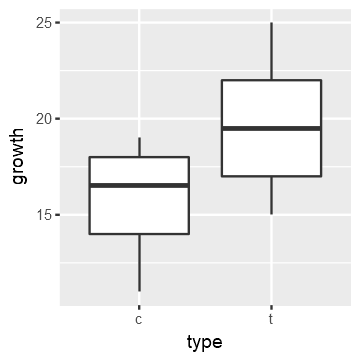

In [126]:
bind_rows(growth2, growth2) %>% gather(type, growth) %>% ggplot(aes(x = type, y = growth)) + geom_boxplot()

In [99]:
growth2 %>% {
    t.test(rep(.$t, 2), rep(.$c, 2), var=TRUE)
}


	Two Sample t-test

data:  rep(.$t, 2) and rep(.$c, 2)
t = 3.0224, df = 22, p-value = 0.00626
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.203039 6.463627
sample estimates:
mean of x mean of y 
 19.66667  15.83333 


### ex.2

In [107]:
mental <- list(
    pos = c(12, 16, 11, 9, 18, 17, 14, 16, 10, 11), 
    neg = c(9, 10, 11, 8, 7, 9, 6, 10, 11, 13, 12)
)
mental

$pos
 [1] 12 16 11  9 18 17 14 16 10 11

$neg
 [1]  9 10 11  8  7  9  6 10 11 13 12

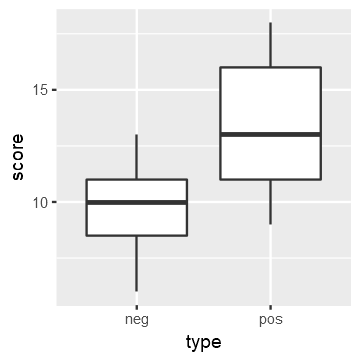

In [123]:
names(mental) %>% sapply(function(x){
    data_frame(type = x, score = mental[[x]])
}, simplify=FALSE) %>% bind_rows() %>% 
    ggplot(aes(x = type, y = score)) + geom_boxplot()

In [103]:
mental$pos %>% shapiro.test()


	Shapiro-Wilk normality test

data:  .
W = 0.92242, p-value = 0.3776


In [104]:
mental$neg %>% shapiro.test()


	Shapiro-Wilk normality test

data:  .
W = 0.98145, p-value = 0.9737


In [113]:
names(mental) %>% sapply(function(x){
    data_frame(type = x, score = mental[[x]])
}, simplify=FALSE) %>% bind_rows() %>% {
    bartlett.test(score ~ type, data = .)
}


	Bartlett test of homogeneity of variances

data:  score by type
Bartlett's K-squared = 1.5467, df = 1, p-value = 0.2136


In [114]:
mental %>% {
    t.test(.$pos, .$neg, var=TRUE)
}


	Two Sample t-test

data:  .$pos and .$neg
t = 3.2085, df = 19, p-value = 0.004626
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.308450 6.218823
sample estimates:
mean of x mean of y 
13.400000  9.636364 


### ex.3 

* 問題文が途中で切れているようだ

In [116]:
diet <- data_frame(
    id = as.character(c(1L:7L)), 
    abdomen = c(1.2, 2.0, 1.3, 1.7, 2.0, 1.9, 1.3), 
    jogging = c(2.3, 2.6, 1.9, 2.8, 1.5, 1.9, 2.2)
)
diet

id,abdomen,jogging
1,1.2,2.3
2,2.0,2.6
3,1.3,1.9
4,1.7,2.8
5,2.0,1.5
6,1.9,1.9
7,1.3,2.2


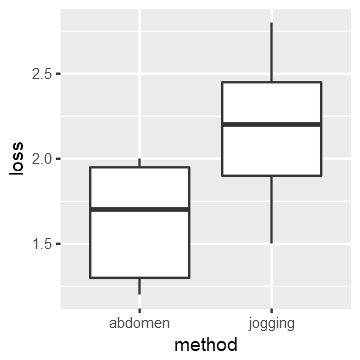

In [122]:
diet %>% gather(method, loss, -id) %>% ggplot(aes(x = method, y = loss)) + geom_boxplot()

In [118]:
diet$abdomen %>% shapiro.test()


	Shapiro-Wilk normality test

data:  .
W = 0.83849, p-value = 0.09619


In [119]:
diet$jogging %>% shapiro.test()


	Shapiro-Wilk normality test

data:  .
W = 0.97413, p-value = 0.9265


In [120]:
diet %>% gather(method, loss, -id) %>% {
    bartlett.test(loss ~ method, data = .)
}


	Bartlett test of homogeneity of variances

data:  loss by method
Bartlett's K-squared = 0.28985, df = 1, p-value = 0.5903


In [121]:
diet %>% {
    t.test(.$abdomen, .$jogging, var = TRUE, paired = TRUE)
}


	Paired t-test

data:  .$abdomen and .$jogging
t = -2.4065, df = 6, p-value = 0.05282
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.094820765  0.009106479
sample estimates:
mean of the differences 
             -0.5428571 


問題文にはペアであると書かれているが，解答はペアでない結果のようだ

In [128]:
diet %>% {
    t.test(.$abdomen, .$jogging, var = TRUE, paired = FALSE)
}


	Two Sample t-test

data:  .$abdomen and .$jogging
t = -2.5203, df = 12, p-value = 0.02689
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.01216027 -0.07355402
sample estimates:
mean of x mean of y 
 1.628571  2.171429 


In [127]:
devtools::session_info()

Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------


 setting  value                       
 version  R version 3.3.2 (2016-10-31)
 system   x86_64, mingw32             
 ui       RTerm                       
 language en_US.UTF-8                 
 collate  Japanese_Japan.932          
 tz       Asia/Tokyo                  
 date     2017-05-14                  

 package    * version    date       source                            
 assertthat   0.2.0      2017-04-11 CRAN (R 3.3.2)                    
 Cairo      * 1.5-9      2015-09-26 CRAN (R 3.2.2)                    
 colorspace   1.3-2      2016-12-14 CRAN (R 3.3.3)                    
 crayon       1.3.2      2016-06-28 CRAN (R 3.3.1)                    
 DBI          0.6-1      2017-04-01 CRAN (R 3.3.3)                    
 devtools     1.12.0     2016-06-24 CRAN (R 3.3.1)                    
 digest       0.6.12     2017-01-27 CRAN (R 3.3.3)                    
 dplyr      * 0.5.0      2016-06-24 CRAN (R 3.2.5)                    
 evaluate     0.10       2016-10-11 CRAN (R 3.3.